# Flight Delays

## Imports and data

In [3]:
from altair import *

In [4]:
flights = load_dataset('flights-5k')

In [5]:
flights.head()

,date,delay,destination,distance,origin
0,2001-01-10 18:20:00,25,HOU,192,SAT
1,2001-01-31 16:45:00,17,OAK,371,SNA
2,2001-02-16 12:07:00,21,SAN,417,SJC
3,2001-02-03 17:00:00,-5,SAN,480,SMF
4,2001-01-02 12:16:00,5,PHX,833,OKC


In [5]:
len(flights)

5000

## Flight delays and distance

Create a visualization that explores the following question:

> Are longer/shorter flights more or less on time?

Keep in mind that there are 5000 observations here. To answer this question will likely require some sort of aggregation so draw out the correlations.

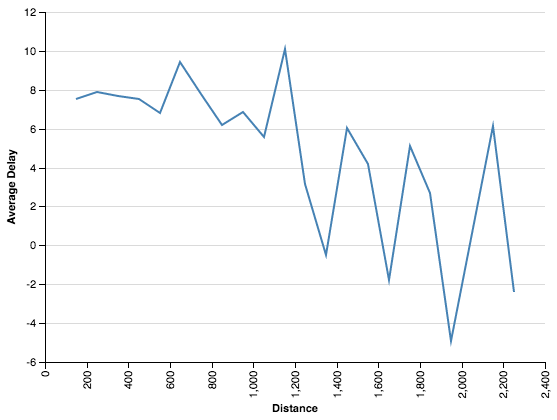

In [48]:
Chart(flights).mark_line().encode(
    X('distance', title='Distance', bin=Bin(maxbins=25)),
    Y('average(delay)', title='Average Delay')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

As the distance traveled gets longer the average delay decreases. This is subject to some fluctuation, but the general trend is there.

## Delays over time

Create a visualization that explores the following question:

> How do average flight delays vary with the day of the week in this dataset?

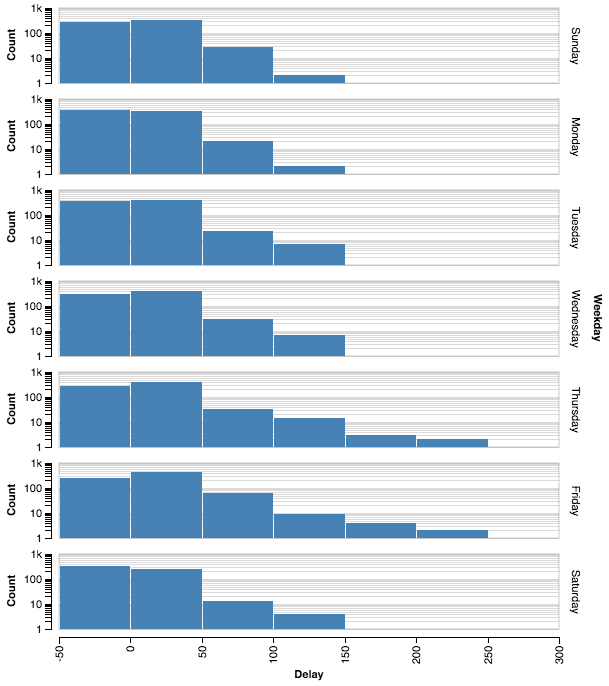

In [49]:
Chart(flights).mark_bar().encode(
    X('delay:Q', bin=True, title='Delay'),
    Y('count(*):Q', title='Count', axis=Axis(ticks=5), scale=Scale(type='log')),
    Row('date:T', timeUnit='day', title='Weekday')
).configure_cell(height=75)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

On certain days, such as Thursday and Friday, there are a greater variation in delays. On those days it is more likely to experience higher delay, while the rate of early arrivals seems constant across all days.

## Delays by origin and destination

Create a visualization that allows explores the following question:

> Which airports (both origin and detination) have the best and worst average delays?

In creating this visualiztion, there are three variables you need to look at. This means you will need to use at least three encoding channels. Finding the right encoding channels and marks is the challenge here!

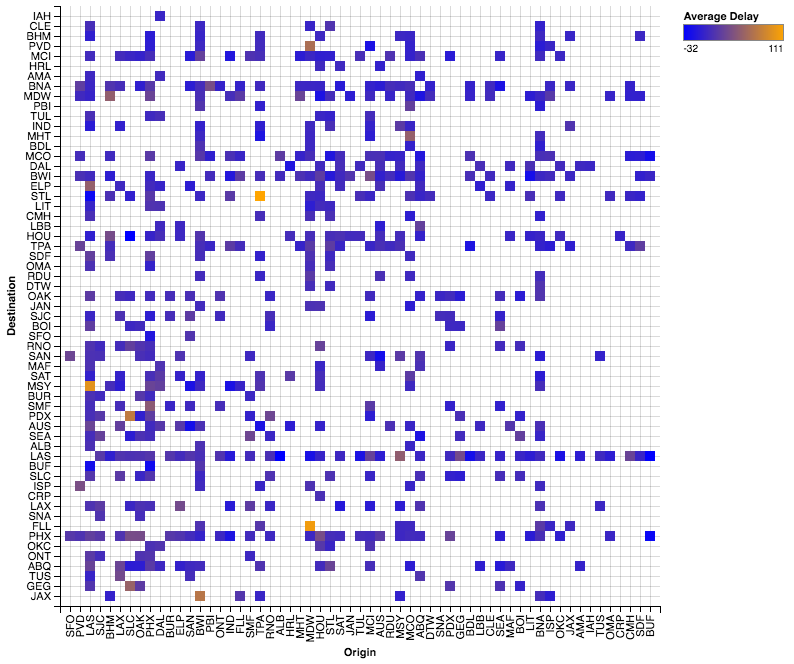

In [129]:
Chart(flights, height=600, width=600).mark_square().encode(
    X('origin', title='Origin', axis=Axis(grid=True),
       sort=SortField(field='delay', op='average', order='descending')),
    Y('destination', axis=Axis(grid=True), title='Destination',
       sort=SortField(field='delay', op='average', order='descending')),
    Color('average(delay):Q', scale=Scale(range=['blue','orange']), title='Average Delay')
).configure_mark(size=100)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

The worst delay between two airports is leaving from TPA and flying to STL. The best 